In [1]:
import numpy as np

In [2]:
import random

In [3]:
import time

In [4]:
import networkx as nx

In [5]:
import nltk

<h3>Generating random n random cities and distances between them.</h3>

<p><small>*The below mentioned code creates a random array of elements of size n^2.*<br>
    *It then makes the diagonal elements 0(considering the distance between a city and itself is 0)*<br>
    *The last section of code makes symmetric elements of array (Since, dist b/w n to m is equal to dist b/w m to n.)*</small></p>

In [18]:
n = 15
dist = np.array([random.sample(range(n**2),n**2)])
dist = dist.reshape(n,n)

for i in range(n):
    dist[i][i] = 0
    
for i in range(n):
    for j in range(n):
        if j < i:
            dist[i][j] = dist[j][i]

In [7]:
dist = np.array([[ 0, 82, 19, 39, 99, 73, 40, 34, 69, 81],
       [82,  0, 41, 63, 53, 60, 93, 27,  2, 10],
       [19, 41,  0, 26, 36, 67, 52, 87, 56, 94],
       [39, 63, 26,  0, 76, 57, 55, 35, 45, 11],
       [99, 53, 36, 76,  0, 64, 58, 28, 44, 29],
       [73, 60, 67, 57, 64,  0, 62,  3,  6, 75],
       [40, 93, 52, 55, 58, 62,  0, 16, 80, 47],
       [34, 27, 87, 35, 28,  3, 16,  0,  5, 91],
       [69,  2, 56, 45, 44,  6, 80,  5,  0,  1],
       [81, 10, 94, 11, 29, 75, 47, 91,  1,  0]])

In [19]:
dist

array([[  0,  54, 209, 188, 127, 101,  23, 162, 195,  81,  85, 211, 164,
        141, 173],
       [ 54,   0, 132, 161,  95, 151,  66, 131,  77,   4,  79, 156,  53,
        103, 205],
       [209, 132,   0, 116, 154, 215, 152, 179, 150,  43,  93,  25, 182,
         76, 121],
       [188, 161, 116,   0,  59, 191,  56,  26, 181, 104,  82, 112, 168,
         68, 125],
       [127,  95, 154,  59,   0, 210,  34, 145, 136, 139,  10, 126, 124,
        213, 217],
       [101, 151, 215, 191, 210,   0, 185, 129,  61, 163,  92,  28, 119,
         17, 153],
       [ 23,  66, 152,  56,  34, 185,   0, 183, 184, 159, 199,   2, 167,
        171, 106],
       [162, 131, 179,  26, 145, 129, 183,   0, 105, 158,  11, 146, 224,
        107,  30],
       [195,  77, 150, 181, 136,  61, 184, 105,   0, 203,  69, 128, 170,
         97, 177],
       [ 81,   4,  43, 104, 139, 163, 159, 158, 203,   0, 110,  78, 143,
         65,  44],
       [ 85,  79,  93,  82,  10,  92, 199,  11,  69, 110,   0, 186, 165,
       

In [21]:
G = nx.Graph()
for i in range(n):
    for j in range(i+1, n):
        G.add_edge(i, j)
        G[i][j]['weight'] = dist[i][j]

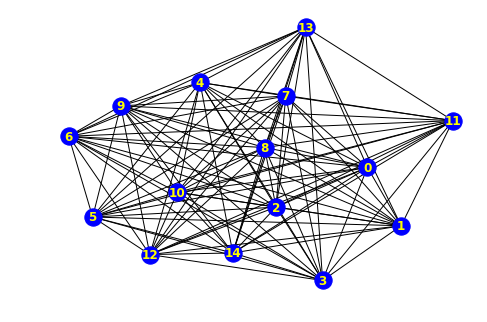

In [22]:
nx.draw(G, with_labels=True, font_weight='bold', font_size='large', font_color="yellow", node_color="blue")

<h3>Declaring cities as 0-n</h3>

In [23]:
cities = [i for i in range(n)]

<h3>Declaring the size of population </h3>

In [24]:
POPULATION_SIZE = 300

<h3>Defining the class Individual</h3>

<p><small>
    __Data this class contains :__ <br><br>
    *__chromosome__ :- it is list which contains the path*<br>
    *__fitness__ :- it is an integer which contains the fitness of an Individual object*<br><br><br>
    __Methods of this class : __<br><br>
    *__create_gnome ::__ <br>__Input__ : the class itself<br>__Return__ : a random path<br>  *
    *__mate ::__<br>__Input__ : two individual objects(One acts as an invoker)<br>__Return__:an object of Individual class which acts as child<br>*
    *__mutation ::__<br>__Input__: the object itself<br>__Return__: if probability allows, swaps two random cities in the path<br>*
    *__cal_fitness ::__<br>__Input__: the object itself<br>__Return__: it return the path length as fitness of Individual object<br>*
    
    
    
    
    
</small></p>

In [25]:
class Individual():
    
    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.path_length = self.cal_path_length()
        self.fitness = self.cal_fitness()
        
    @classmethod
    def create_gnome(self):
        gnome = []
        temp = [i for i in cities]
        for i in cities:
            x = random.choice(temp)
            gnome.append(x)
            temp.remove(x)    
        return(gnome)
    
    def mate(self, par2):
        x_part = 3
        y_part = 6
        t1 = self.chromosome[x_part:y_part]
        t2 = par2.chromosome[x_part:y_part]
        child1 = []
                
        for i, j in zip(self.chromosome[0:x_part], par2.chromosome[0:x_part]):
            if i not in t2 :
                child1.append(i) 
            else:
                temp1 = random.choice(t1)
                while (temp1 in t2) or (temp1 in child1) :
                    temp1 = random.choice(t1)
                child1.append(temp1)
        
        child1 = child1+t2
               
        length = len(cities)
        for i, j in zip(self.chromosome[y_part:length], par2.chromosome[y_part:length]):
            if (i not in t2):
                child1.append(i)
            else:
                temp1 = random.choice(t1)
                while temp1 in t2 or temp1 in child1:
                    temp1 = random.choice(t1)
                child1.append(temp1)
        return(Individual(child1))
    
    def mutation(self):
        global cities
        prob = random.random()
        mutation_rate = 0.4
        if prob < mutation_rate:
            x = random.choice(cities)
            y = random.choice(cities)
            temp = self.chromosome[x]
            self.chromosome[x] = self.chromosome[y]
            self.chromosome[y] = temp
            

    def cal_fitness(self):
        return (self.path_length)**2
    
    
    def cal_path_length(self):
        path = 0
        length = len(self.chromosome)
        for i in range(length-1):
            path = path + dist[self.chromosome[i], self.chromosome[i+1]]
        
        path = path + dist[self.chromosome[length-1],self.chromosome[0]]
        
        return path

    @classmethod   
    def selection(self, population):
        while True:
            max_fitness = 1000000000000000000
            par = random.choice(population)
            prob = random.randint(0, max_fitness)
        
            if(prob > par.fitness):
                return par

<h3>Defining the main function </h3>

<p>__In main, we follow the following steps : __<br>
   *->A random population of Individual objects is created.*<br>
   *->Objects are sorted according to their fitness values.*<br>
   *->The first 20% of sorted objects is directly sent to the new generation.*<br>
   *->The remaining childs are created by randomly choosing parents from the population and added to next generation.<br>*
    </p>

In [26]:
def main():
    global POPULATION_SIZE
    global cities
    generation = 1
    found = False
    
    population = [Individual(Individual.create_gnome()) for _ in range(POPULATION_SIZE)]
    
    while not found:
        population = sorted(population, key = lambda x : x.fitness)
     
        if population[0].path_length <=200 or generation == 1000:
            found = True
            break
            
        new_generation = []
        s = int((10*POPULATION_SIZE)/100)
        new_generation.extend(population[:s])
        
        s = int((90*POPULATION_SIZE)/100)
        for _ in range(s):
            par1, par2 = Individual.selection(population),Individual.selection(population)
            child = par1.mate(par2)
            child.mutation()
            new_generation.append(child)
            
        population = new_generation
        
        print("Generation: {}\tPath: {}\tPath_Length: {}".format(generation,population[0].chromosome,population[0].path_length))
        generation += 1
    
    print("Generation: {}\tPath: {}\tPath_Length: {}".format(generation,population[0].chromosome,population[0].path_length))

    generation += 1
    
    p = population[0].chromosome
    p = list(nltk.bigrams(p))
    nx.draw(G, with_labels=True, font_weight='bold', edgelist=p)


<h3>Invoking the main function</h3>

In [27]:
average_time = []

C:\Users\Nuages\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Generation: 1	Path: [4, 10, 3, 7, 8, 14, 13, 12, 1, 9, 11, 5, 2, 0, 6]	Path_Length: 1137
Generation: 2	Path: [4, 10, 3, 7, 8, 14, 13, 12, 1, 9, 11, 5, 2, 0, 6]	Path_Length: 1137
Generation: 3	Path: [4, 10, 3, 7, 8, 14, 13, 12, 1, 9, 11, 5, 2, 0, 6]	Path_Length: 1137
Generation: 4	Path: [4, 14, 3, 7, 10, 2, 13, 12, 11, 9, 1, 5, 8, 0, 6]	Path_Length: 1037
Generation: 5	Path: [4, 14, 3, 7, 10, 2, 13, 12, 11, 9, 1, 5, 8, 0, 6]	Path_Length: 1037
Generation: 6	Path: [4, 14, 3, 7, 10, 2, 13, 12, 11, 9, 1, 5, 8, 0, 6]	Path_Length: 1037
Generation: 7	Path: [4, 10, 1, 0, 6, 9, 8, 7, 13, 12, 11, 14, 5, 2, 3]	Path_Length: 963
Generation: 8	Path: [4, 10, 1, 0, 6, 9, 8, 7, 13, 12, 11, 14, 5, 2, 3]	Path_Length: 963
Generation: 9	Path: [4, 10, 1, 0, 6, 9, 8, 7, 13, 12, 11, 14, 5, 2, 3]	Path_Length: 963
Generation: 10	Path: [10, 8, 4, 3, 7, 14, 0, 6, 1, 9, 12, 13, 5, 11, 2]	Path_Length: 905
Generation: 11	Path: [10, 8, 4, 3, 7, 14, 0, 6, 1, 9, 12, 13, 5, 11, 2]	Path_Length: 905
Generation: 12	Path: [10

Generation: 209	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 210	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 211	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 212	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 213	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 214	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 215	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 216	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 217	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 218	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 219	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation

Generation: 301	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 302	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 303	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 304	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 305	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 306	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 307	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 308	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 309	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 310	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 311	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation

Generation: 397	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 398	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 399	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 400	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 401	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 402	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 403	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 404	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 405	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 406	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 407	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation

Generation: 489	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 490	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 491	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 492	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 493	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 494	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 495	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 496	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 497	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 498	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 499	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation

Generation: 597	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 598	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 599	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 600	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 601	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 602	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 603	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 604	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 605	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 606	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 607	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation

Generation: 708	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 709	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 710	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 711	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 712	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 713	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 714	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 715	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 716	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 717	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 718	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation

Generation: 832	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 833	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 834	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 835	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 836	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 837	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 838	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 839	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 840	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 841	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 842	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation

Generation: 934	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 935	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 936	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 937	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 938	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 939	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 940	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 941	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 942	Path: [1, 9, 2, 3, 7, 14, 11, 8, 0, 4, 10, 6, 5, 13, 12]	Path_Length: 603
Generation: 943	Path: [1, 9, 2, 11, 8, 7, 3, 6, 0, 4, 10, 14, 5, 13, 12]	Path_Length: 566
Generation: 944	Path: [1, 9, 2, 11, 8, 7, 3, 6, 0, 4, 10, 14, 5, 13, 12]	Path_Length: 566
Generation

C:\Users\Nuages\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
C:\Users\Nuages\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


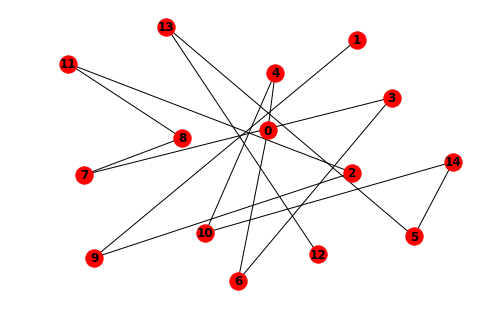

In [28]:
if __name__ == "__main__":
    s = time.clock()
    main()
    average_time.append(time.clock()-s)
    print(time.clock()-s)
    


In [64]:
sum(average_time)/len(average_time)

0.6676918007692271

<p><font color = "darkgreen"><b>Parameters to be tuned : </b></font><br>
    <font color = "green">population_size<br>
    mutation_rate<br>
    percentage population to be passed to next generation<br>
    stopping criteria(minimum path_length or max_generations)</font><br>